In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import xgboost
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('Placement_Data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [4]:
data.shape

(215, 15)

In [5]:
data.describe()


,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [6]:
data.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [7]:
numerical=data.select_dtypes(include=np.number)
print(len(numerical.columns))
numerical.columns

7


Index(['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary'], dtype='object')

In [1]:
categorical=data.select_dtypes(include=object)
print(len(categorical.columns))
categorical.columns

NameError: name 'data' is not defined

In [9]:
data = data.drop('sl_no',axis=1)

In [10]:
data['salary'] = data['salary'].fillna(0)

In [11]:
data['status'].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

<AxesSubplot:xlabel='status', ylabel='count'>

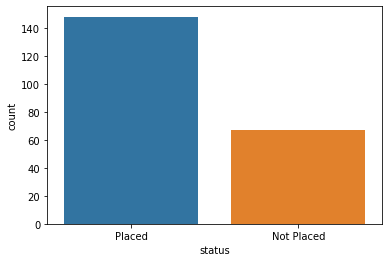

In [12]:
sns.countplot(data.status)

In [13]:
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [14]:
plt.style.use('ggplot')
plt.figure(figsize=(20,25))

<Figure size 1440x1800 with 0 Axes>

<Figure size 1440x1800 with 0 Axes>

<AxesSubplot:title={'center':'gender'}>

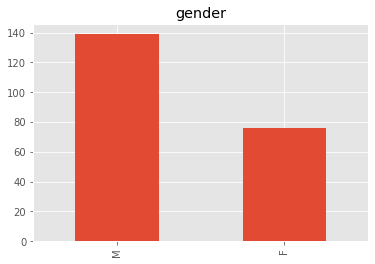

In [15]:
data['gender'].value_counts().plot(kind='bar',title='gender')

In [16]:
data['salary'] = data['salary'].fillna(0)

In [17]:
data.isnull().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

<AxesSubplot:title={'center':'ssc_b'}>

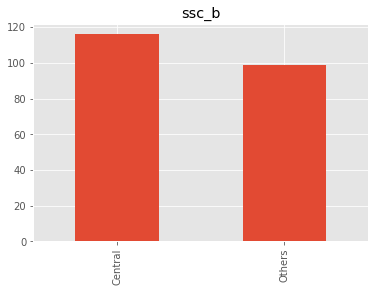

In [18]:

data['ssc_b'].value_counts().plot(kind='bar',title='ssc_b')

<AxesSubplot:title={'center':'hsc_b'}>

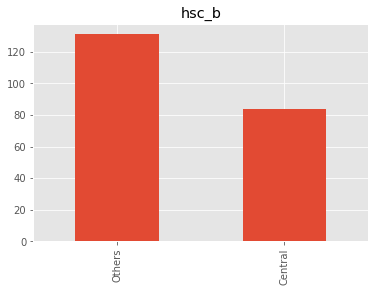

In [19]:
data['hsc_b'].value_counts().plot(kind='bar',title='hsc_b')

<AxesSubplot:title={'center':'hsc_s'}>

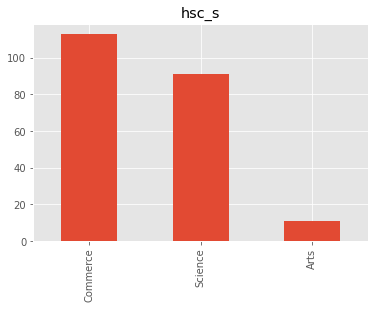

In [20]:
data['hsc_s'].value_counts().plot(kind='bar',title='hsc_s')

<AxesSubplot:title={'center':'degree_t'}>

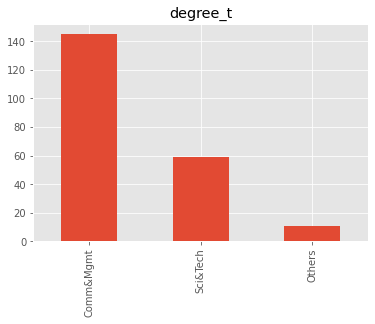

In [21]:
data['degree_t'].value_counts().plot(kind='bar',title='degree_t')

<AxesSubplot:title={'center':'workex'}>

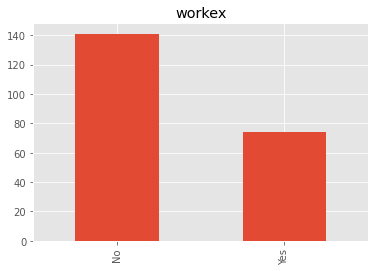

In [22]:
data['workex'].value_counts().plot(kind='bar',title='workex')

<AxesSubplot:title={'center':'specialisation'}>

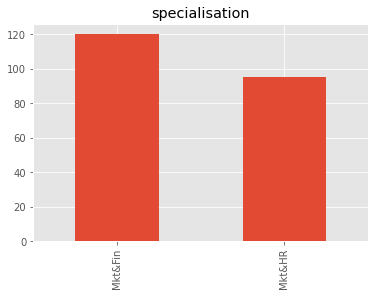

In [23]:
data['specialisation'].value_counts().plot(kind='bar',title='specialisation')

<AxesSubplot:title={'center':'status'}>

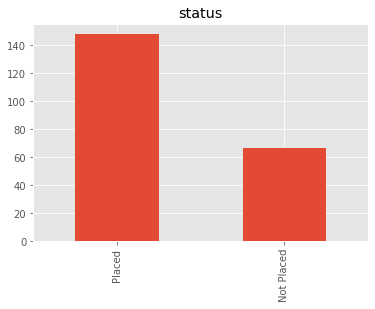

In [24]:
data['status'].value_counts().plot(kind='bar',title='status')

In [25]:
plt.figure(figsize=(20,15))

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

<AxesSubplot:title={'center':'ssc_p'}, ylabel='Frequency'>

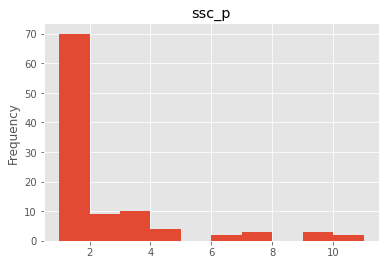

In [26]:
data['ssc_p'].value_counts().plot(kind='hist',title='ssc_p')

<AxesSubplot:title={'center':'hsc_p'}, ylabel='Frequency'>

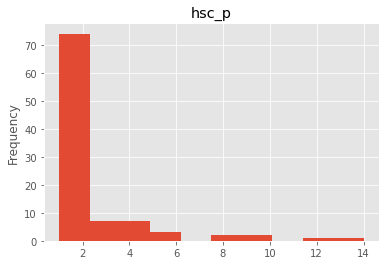

In [27]:
data['hsc_p'].value_counts().plot(kind='hist',title='hsc_p')

<AxesSubplot:title={'center':'etest_p'}, ylabel='Frequency'>

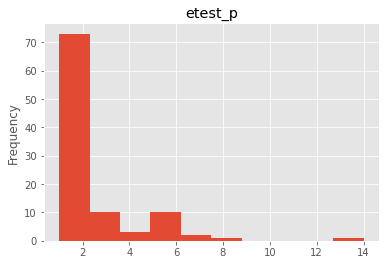

In [28]:
data['etest_p'].value_counts().plot(kind='hist',title='etest_p')

<AxesSubplot:title={'center':'mba_p'}, ylabel='Frequency'>

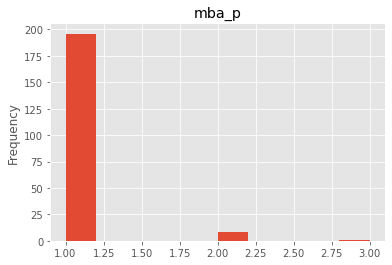

In [29]:
data['mba_p'].value_counts().plot(kind='hist',title='mba_p')

<AxesSubplot:title={'center':'salary'}, ylabel='Frequency'>

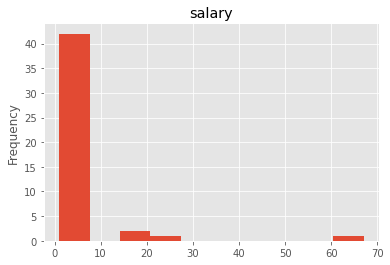

In [30]:
data['salary'].value_counts().plot(kind='hist',title='salary')

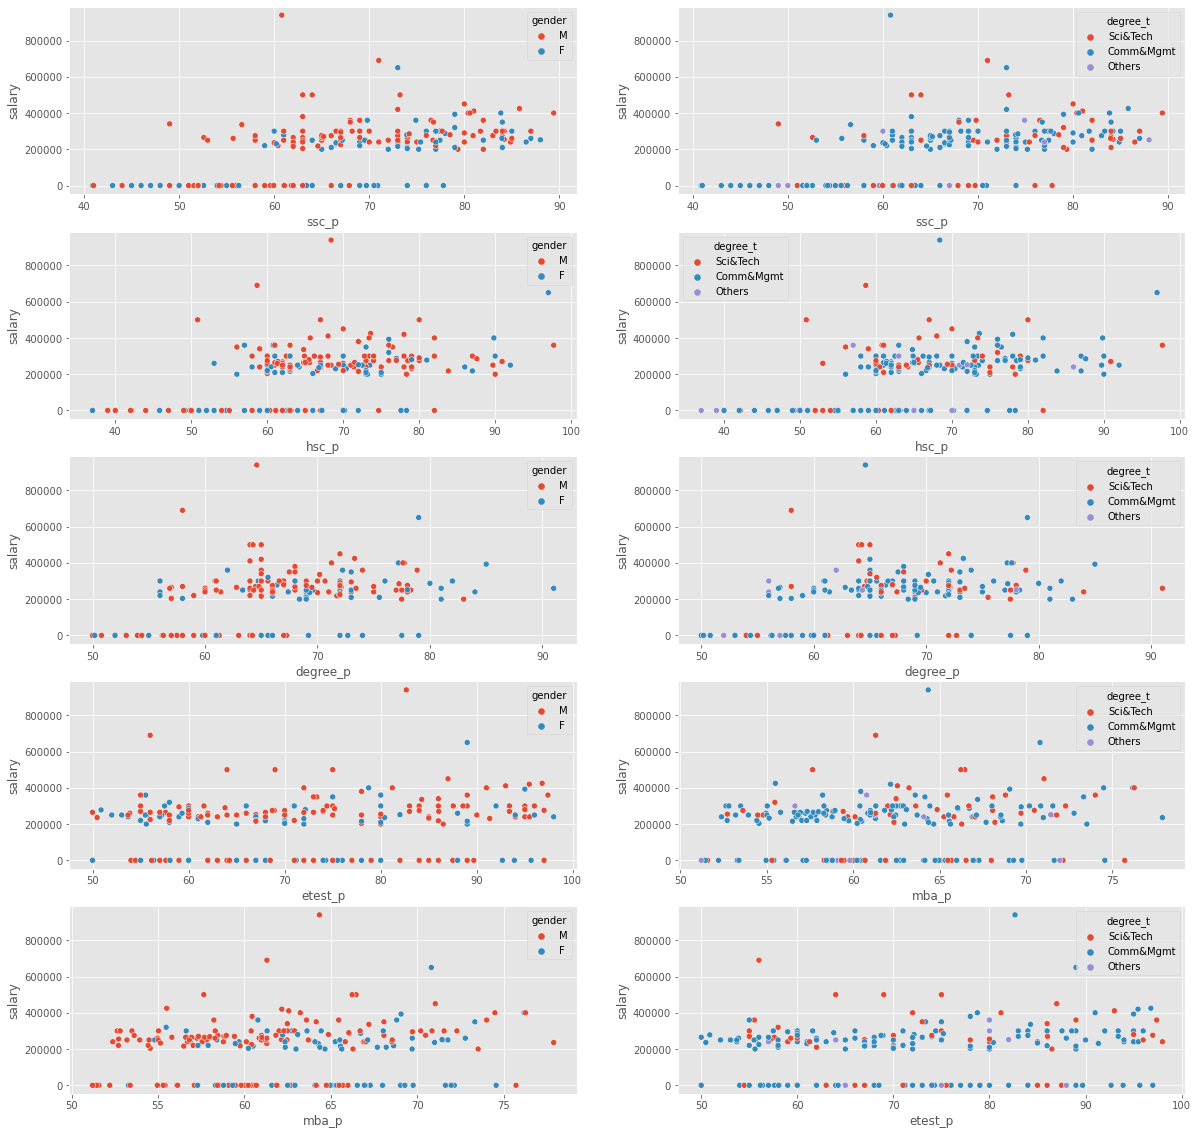

In [31]:
plt.figure(figsize=(20,20))
plt.subplot(5,2,1)
sns.scatterplot(data=data, x="ssc_p", y="salary", hue="gender")
plt.subplot(5,2,2)
sns.scatterplot(data=data, x="ssc_p", y="salary", hue="degree_t")
plt.subplot(5,2,3)
sns.scatterplot(data=data, x="hsc_p", y="salary", hue="gender")
plt.subplot(5,2,4)
sns.scatterplot(data=data, x="hsc_p", y="salary", hue="degree_t")
plt.subplot(5,2,5)
sns.scatterplot(data=data, x="degree_p", y="salary", hue="gender")
plt.subplot(5,2,6)
sns.scatterplot(data=data, x="degree_p", y="salary", hue="degree_t")
plt.subplot(5,2,7)
sns.scatterplot(data=data, x="etest_p", y="salary", hue="gender")
plt.subplot(5,2,8)
sns.scatterplot(data=data, x="mba_p", y="salary", hue="degree_t")
plt.subplot(5,2,9)
sns.scatterplot(data=data, x="mba_p", y="salary", hue="gender")
plt.subplot(5,2,10)
sns.scatterplot(data=data, x="etest_p", y="salary", hue="degree_t")
plt.show()

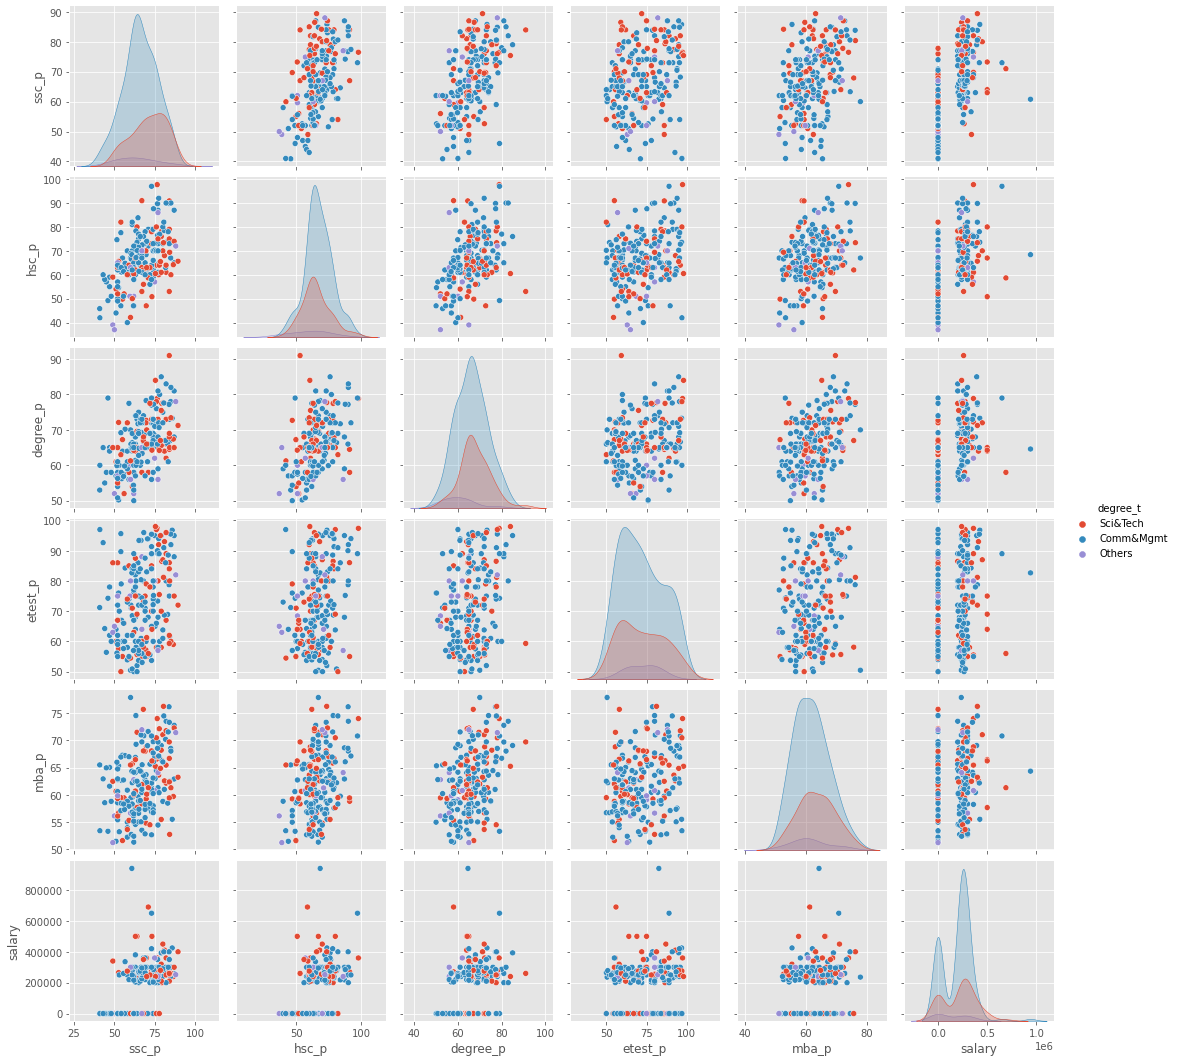

In [32]:
sns.pairplot(data, hue="degree_t")
plt.show()

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [35]:
cols = ['gender','ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation','status']
data[cols] = data[cols].apply(LabelEncoder().fit_transform)
data.head(n=5)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0


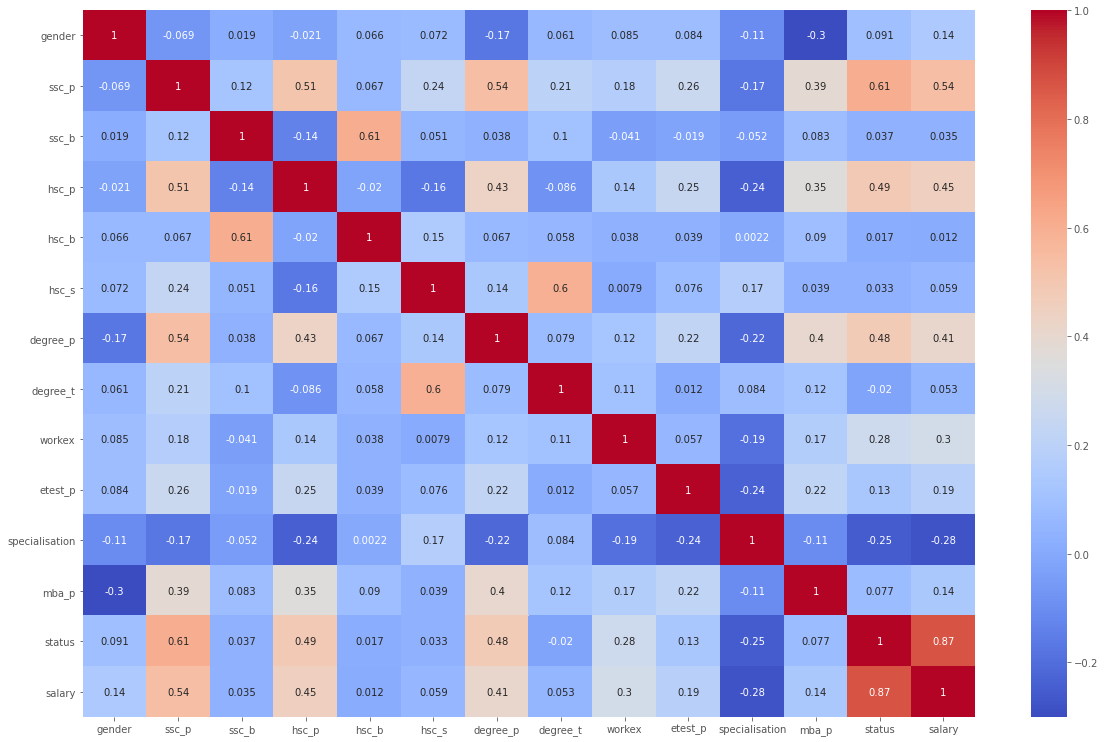

In [36]:
plt.figure(figsize=(20,13))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')
plt.show()

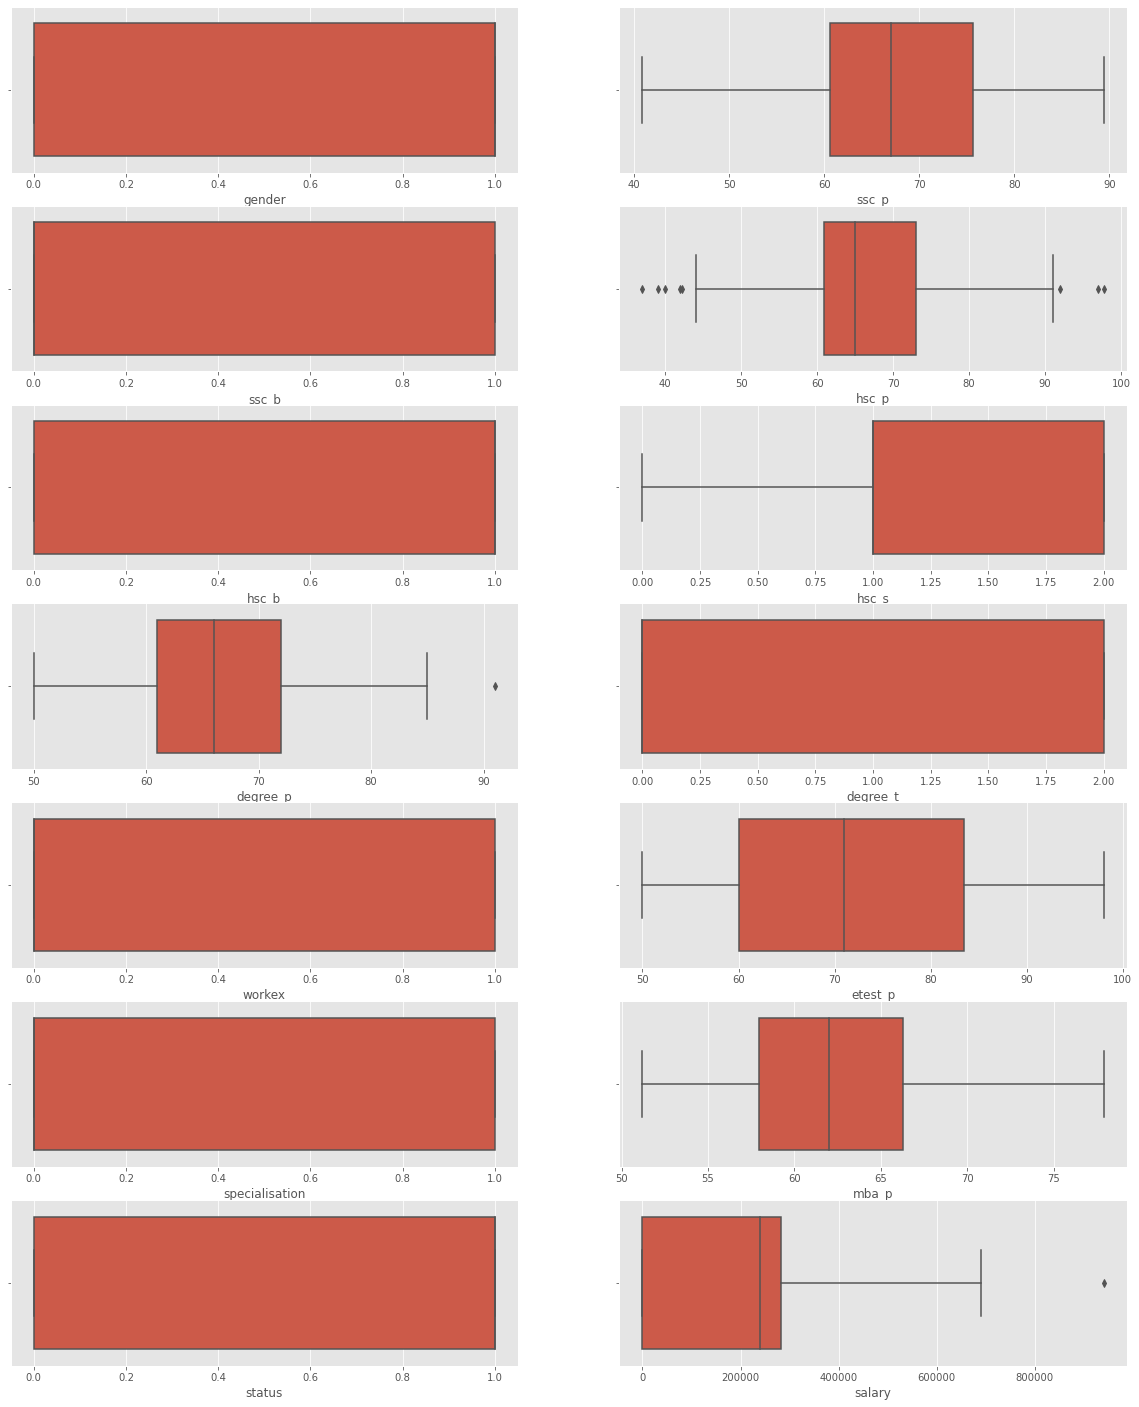

In [37]:
plt.figure(figsize=(20,25))
for i,col in enumerate(data.columns,1):
    plt.subplot(7,2,i)
    sns.boxplot(data=data,x=col, orient="h")
plt.show()

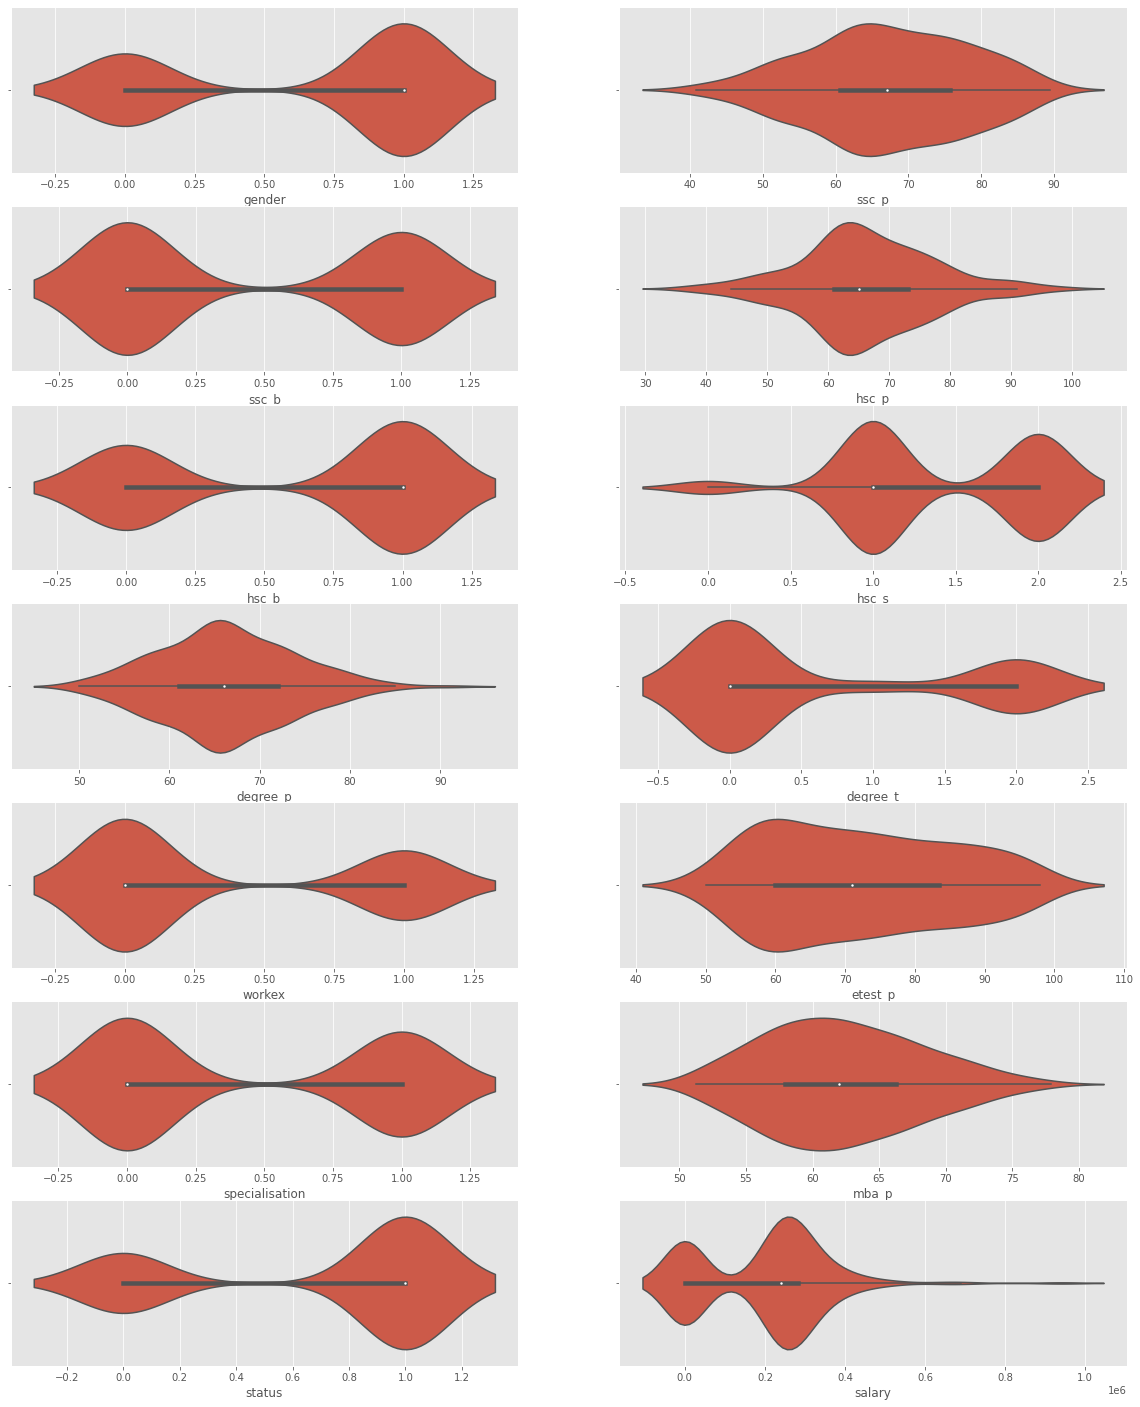

In [38]:
plt.figure(figsize=(20,25))
for i,col in enumerate(data.columns,1):
    plt.subplot(7,2,i)
    sns.violinplot(data=data,x=data[col],orient='h')
plt.show()

data preprocessing

In [39]:
x = data.drop('status',axis=1)
y = data['status']

In [40]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    int32  
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    int32  
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    int32  
 5   hsc_s           215 non-null    int32  
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    int32  
 8   workex          215 non-null    int32  
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    int32  
 11  mba_p           215 non-null    float64
 12  salary          215 non-null    float64
dtypes: float64(6), int32(7)
memory usage: 16.1 KB


In [46]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=123)
print(len(x_train)) 
print(len(x_test)) 
print(len(y_train)) 
print(len(y_test))

161
54
161
54


In [47]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [48]:
log_acc=accuracy_score(y_test,log_reg.predict(x_test))

In [51]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,auc,roc_auc_score

In [53]:
print("Train Set Accuracy:"+str(accuracy_score(y_train,log_reg.predict(x_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,log_reg.predict(x_test))*100))

Train Set Accuracy:100.0
Test Set Accuracy:100.0


In [54]:
confusion_matrix(y_test,log_reg.predict(x_test))

array([[19,  0],
       [ 0, 35]], dtype=int64)

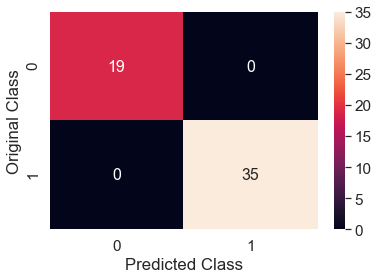

In [55]:
plt.figure(figsize=(6,4))
df_ = pd.DataFrame(confusion_matrix(y_test, log_reg.predict(x_test)), range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_, annot=True,annot_kws={"size": 16}, fmt='g')
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

In [57]:
y_pred= log_reg.predict(x_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)

In [58]:
auc_keras = auc(fpr_keras, tpr_keras)

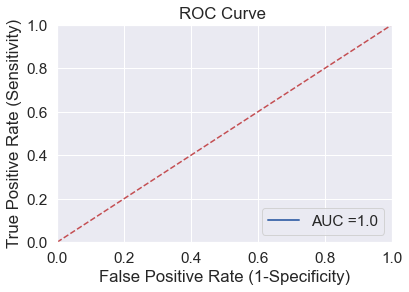

In [61]:
plt.title('ROC Curve ')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr_keras, tpr_keras, label = 'AUC =' + str(auc_keras), lw=2)
plt.legend(loc=4) #Location of label
plt.show()

In [63]:
d_tree = DecisionTreeClassifier()
d_tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [64]:
d_acc=accuracy_score(y_test,d_tree.predict(x_test))

In [65]:
print("Train Set Accuracy:"+str(accuracy_score(y_train,d_tree.predict(x_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,d_tree.predict(x_test))*100))

Train Set Accuracy:100.0
Test Set Accuracy:100.0


In [68]:
confusion_matrix(y_test, d_tree.predict(x_test))

array([[19,  0],
       [ 0, 35]], dtype=int64)

In [70]:
y_pred= d_tree.predict(x_test)

In [71]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [72]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        35

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



In [75]:
roc_auc= auc(fpr, tpr)
print(roc_auc)

1.0


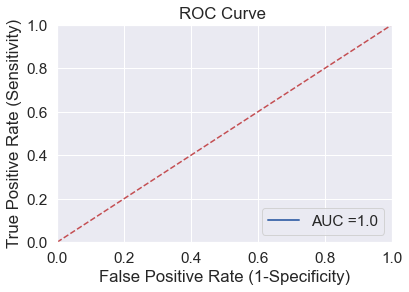

In [76]:
plt.title('ROC Curve ')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr, tpr, label = 'AUC =' + str(roc_auc), lw=2)
plt.legend(loc=4) #Location of label
plt.show()

In [77]:
r_for = RandomForestClassifier()
r_for.fit(x_train,y_train)

r_acc=accuracy_score(y_test,r_for.predict(x_test))

In [81]:
accuracy_score(y_train,r_for.predict(x_train))*100
                                     

100.0

In [82]:
accuracy_score(y_test,r_for.predict(x_test))*100

100.0

In [84]:
y_pred= r_for.predict(x_test)(confusion_matrix(y_test, r_for.predict(x_test)))

array([[19,  0],
       [ 0, 35]], dtype=int64)

In [85]:
y_pred= r_for.predict(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)


In [86]:
roc_auc= auc(fpr, tpr)
print(roc_auc)

1.0


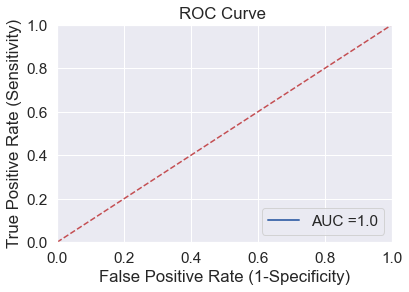

In [87]:
plt.title('ROC Curve ')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr, tpr, label = 'AUC =' + str(roc_auc), lw=2)
plt.legend(loc=4) #Location of label
plt.show()

In [92]:
k_nei = KNeighborsClassifier()
k_nei.fit(x_train,y_train)

k_acc = accuracy_score(y_test,k_nei.predict(x_test))

print("Train set Accuracy:"+str(accuracy_score(y_train,k_nei.predict(x_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,k_nei.predict(x_test))*100))

Train set Accuracy:100.0
Test Set Accuracy:100.0


In [93]:
confusion_matrix(y_test, k_nei.predict(x_test))

array([[19,  0],
       [ 0, 35]], dtype=int64)

In [95]:
y_pred= k_nei.predict(x_test)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)

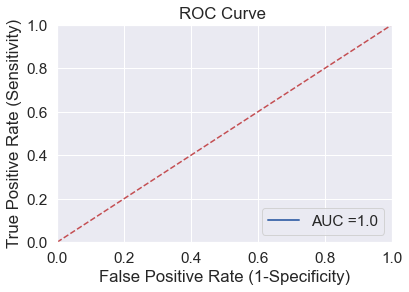

In [96]:
plt.title('ROC Curve ')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr, tpr, label = 'AUC =' + str(roc_auc), lw=2)
plt.legend(loc=4) #Location of label
plt.show()

In [97]:
s_vec = SVC()
s_vec.fit(x_train,y_train)

s_acc = accuracy_score(y_test,s_vec.predict(x_test))

print("Train set Accuracy:"+str(accuracy_score(y_train,s_vec.predict(x_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,s_vec.predict(x_test))*100))

Train set Accuracy:100.0
Test Set Accuracy:100.0


In [98]:
confusion_matrix(y_test, s_vec.predict(x_test))

array([[19,  0],
       [ 0, 35]], dtype=int64)

In [99]:
y_pred= s_vec.predict(x_test)
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)

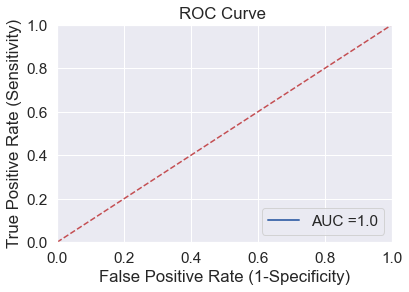

In [100]:
plt.title('ROC Curve ')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr, tpr, label = 'AUC =' + str(roc_auc), lw=2)
plt.legend(loc=4) #Location of label
plt.show()

In [102]:
models = pd.DataFrame({
    'Model': ['Logistic','KNN', 'SVC',  'Decision Tree Classifier',
             'Random Forest Classifier'],
    'Score': [ log_acc,k_acc, s_acc, d_acc, r_acc]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,Logistic,1.0
1,KNN,1.0
2,SVC,1.0
3,Decision Tree Classifier,1.0
4,Random Forest Classifier,1.0


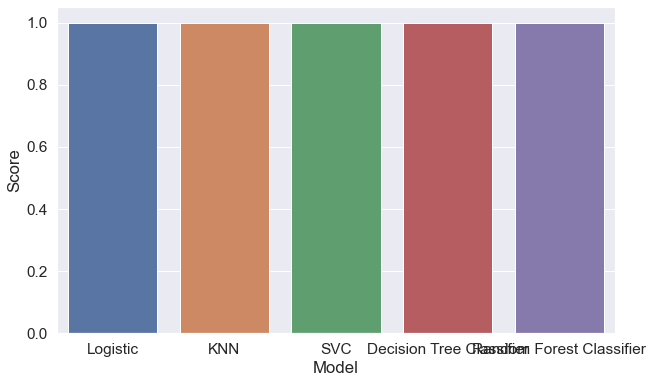

In [103]:
plt.figure(figsize=(10,6))
sns.barplot(x='Model',y='Score',data=models)
plt.show()

In [105]:
x1 = data.drop('salary',axis=1)
y1 = data['salary']

In [106]:
x1 = x1.values
y1 = y1.values

In [107]:
split = int(0.9*x1.shape[0])
print(split)

193


In [116]:
split = int(0.9*x1.shape[0])
print(split)

x_train1 = x1[:split,:]
y_train1 = y1[:split]

x_test1 = x1[split:,:]
y_test1 = y1[split:]

print(x_train1.shape,y_train1.shape)
print(x_test1.shape,y_test1.shape)

193
(193, 13) (193,)
(22, 13) (22,)


In [119]:
x_mean1 = x_train1.mean(axis=0)
x_std1 = x_train1.std(axis=0)

x_train1 = (x_train1-x_mean1)/x_std1

x_test1 = (x_test1-x_mean1)/x_std1

In [120]:
print(len(x_train1)) 
print(len(x_test1)) 
print(len(y_train1)) 
print(len(y_test1))

193
22
193
22


In [121]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

In [122]:
k_reg = KNeighborsRegressor()
k_reg.fit(x_train1,y_train1)

k_acc = r2_score(y_test1,k_reg.predict(x_test1))

print("Train accuracy:", (k_reg.score(x_train1,y_train1))*100)
print("Test accuracy:", (k_reg.score(x_test1,y_test1))*100)

Train accuracy: 74.08497944106153
Test accuracy: 66.0092282983047


In [123]:
calculation = pd.DataFrame(np.c_[y_test1,k_reg.predict(x_test1)], columns = ["Original Salary","PredictSalary"])
calculation.head(5)

,Original Salary,PredictSalary
0,300000.0,132800.0
1,0.0,48000.0
2,275000.0,420000.0
3,250000.0,372000.0
4,260000.0,354000.0


<AxesSubplot:ylabel='Count'>

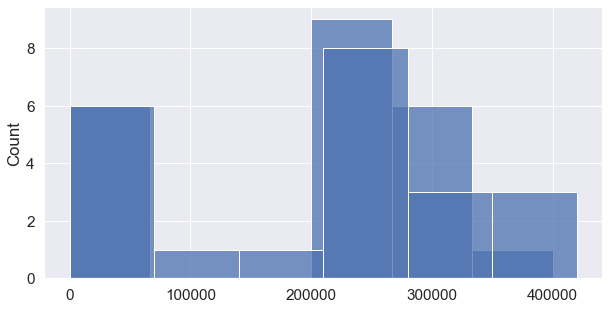

In [125]:
plt.figure(figsize=(10,5))
sns.histplot(y_test1)
sns.histplot(k_reg.predict(x_test1))

In [126]:
l_reg = LinearRegression()
l_reg.fit(x_train1,y_train1)

l_acc = r2_score(y_test1,l_reg.predict(x_test1))

print("Train accuracy:", (l_reg.score(x_train1,y_train1))*100)
print("Test accuracy:", (l_reg.score(x_test1,y_test1))*100)

Train accuracy: 76.48209543000438
Test accuracy: 90.87340393572903


In [127]:
calculation = pd.DataFrame(np.c_[y_test1,l_reg.predict(x_test1)], columns = ["Original Salary","PredictSalary"])
calculation.head(5)

,Original Salary,PredictSalary
0,300000.0,291370.706719
1,0.0,16216.566004
2,275000.0,290992.684708
3,250000.0,297580.925582
4,260000.0,248611.320723


<AxesSubplot:ylabel='Count'>

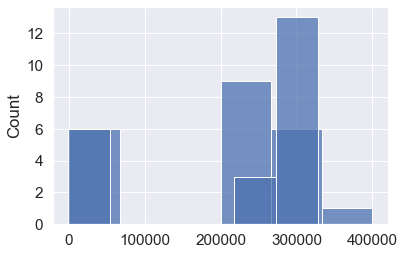

In [129]:
sns.histplot(y_test1)
sns.histplot(l_reg.predict(x_test1))

In [130]:
d_reg = DecisionTreeRegressor()
d_reg.fit(x_train1,y_train1)

d_acc = r2_score(y_test1,d_reg.predict(x_test1))

print("Train accuracy:", (d_reg.score(x_train1,y_train1))*100)
print("Test accuracy:", (d_reg.score(x_test1,y_test1))*100)

Train accuracy: 100.0
Test accuracy: 69.93401719719547


In [131]:
calculation = pd.DataFrame(np.c_[y_test1,d_reg.predict(x_test1)], columns = ["Original Salary","PredictSalary"])
calculation.head(5)

,Original Salary,PredictSalary
0,300000.0,204000.0
1,0.0,0.0
2,275000.0,360000.0
3,250000.0,240000.0
4,260000.0,260000.0


<AxesSubplot:ylabel='Count'>

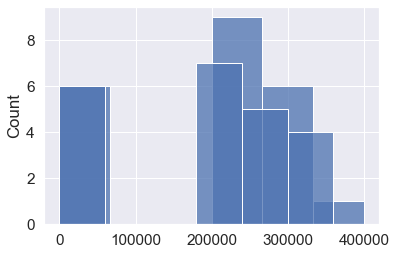

In [132]:
sns.histplot(y_test1)
sns.histplot(d_reg.predict(x_test1))

In [133]:
r_reg = RandomForestRegressor()
r_reg.fit(x_train1,y_train1)

r_acc = r2_score(y_test1,r_reg.predict(x_test1))

print("Training accuracy:",(r_reg.score(x_train1,y_train1))*100)
print("Test accuracy:",(r_reg.score(x_test1,y_test1))*100)

Training accuracy: 96.08021086125123
Test accuracy: 87.48993821781164


In [134]:
calculation = pd.DataFrame(np.c_[y_test1,r_reg.predict(x_test1)], columns = ["Original Salary","PredictSalary"])
calculation.head(5)

,Original Salary,PredictSalary
0,300000.0,364940.0
1,0.0,0.0
2,275000.0,274540.0
3,250000.0,271940.0
4,260000.0,377550.0


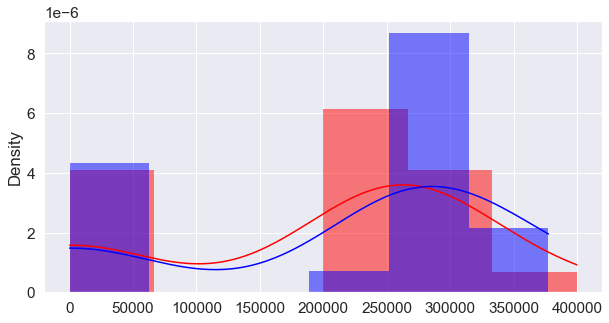

In [135]:
plt.figure(figsize=(10,5))
sns.histplot(y_test1, color="red", kde=True, stat="density", linewidth=0)
sns.histplot(r_reg.predict(x_test1), color="blue", kde=True, stat="density", linewidth=0)
plt.show()

In [136]:
x_reg = XGBRegressor()
x_reg.fit(x_train1,y_train1)

x_acc = r2_score(y_test1,x_reg.predict(x_test1))

print("Training accuracy:",(x_reg.score(x_train1,y_train1))*100)
print("Test accuracy:",(x_reg.score(x_test1,y_test1))*100)

Training accuracy: 99.99999796236114
Test accuracy: 92.18784126191971


In [137]:
calculation = pd.DataFrame(np.c_[y_test1,x_reg.predict(x_test1)], columns = ["Original Salary","PredictSalary"])
calculation.head(5)

,Original Salary,PredictSalary
0,300000.0,335697.187500
1,0.0,-992.233887
2,275000.0,295647.906250
3,250000.0,274795.000000
4,260000.0,243044.953125


In [138]:

models = pd.DataFrame({
    'Models': ['Knn','Linear','DecisionTree','RandomForest','XGB'],
    'Scores': [k_acc,l_acc,d_acc,r_acc,x_acc]

})

models.sort_values(by = 'Scores',ascending = False)

,Models,Scores
4,XGB,0.921878
1,Linear,0.908734
3,RandomForest,0.874899
2,DecisionTree,0.699340
0,Knn,0.660092


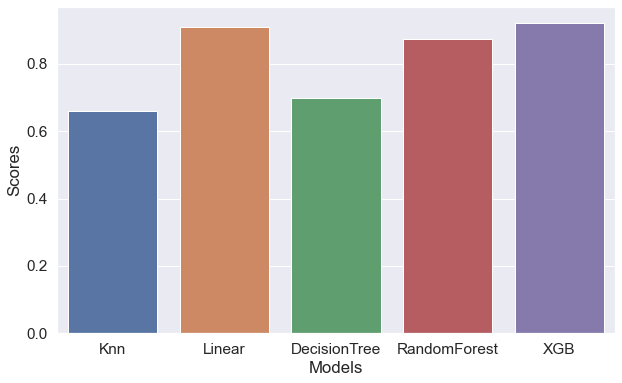

In [139]:
plt.figure(figsize=(10,6))
sns.barplot(x='Models',y='Scores',data=models)
plt.show()